In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [5]:
data_generator.fit(x_train)

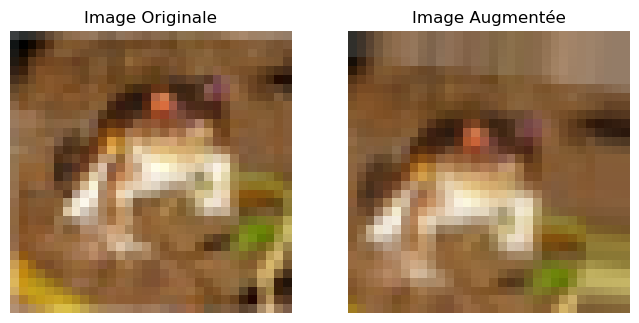

In [7]:
augmented_images = data_generator.flow(x_train[:1], batch_size=1)
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(x_train[0])
axs[0].set_title('Image Originale')
axs[0].axis('off')

axs[1].imshow(augmented_images[0][0])
axs[1].set_title('Image Augmentée')
axs[1].axis('off')

plt.show()


In [8]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1)


Epoch 1/20


352/352 [==============================] - 144s 346ms/step - loss: 1.7155 - accuracy: 0.4327 - val_loss: 2.4029 - val_accuracy: 0.2506
Epoch 2/20
352/352 [==============================] - 106s 302ms/step - loss: 1.1637 - accuracy: 0.5859 - val_loss: 1.0062 - val_accuracy: 0.6356
Epoch 3/20
352/352 [==============================] - 104s 297ms/step - loss: 0.9961 - accuracy: 0.6488 - val_loss: 0.9268 - val_accuracy: 0.6778
Epoch 4/20
352/352 [==============================] - 110s 311ms/step - loss: 0.9004 - accuracy: 0.6824 - val_loss: 0.8816 - val_accuracy: 0.6956
Epoch 5/20
352/352 [==============================] - 109s 309ms/step - loss: 0.8157 - accuracy: 0.7140 - val_loss: 0.7593 - val_accuracy: 0.7346
Epoch 6/20
352/352 [==============================] - 67s 189ms/step - loss: 0.7725 - accuracy: 0.7314 - val_loss: 0.7298 - val_accuracy: 0.7410
Epoch 7/20
352/352 [==============================] - 55s 156ms/step - loss: 0.7248 - accuracy: 0.7450 - val_loss: 0.7245 -

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy (non augmenté): {test_acc}')

313/313 - 5s - loss: 0.6251 - accuracy: 0.7969 - 5s/epoch - 15ms/step

Test accuracy (non augmenté): 0.7968999743461609


In [11]:
augmented_images_generator = data_generator.flow(x_test, y_test)

In [12]:
test_loss_aug, test_acc_aug = model.evaluate(augmented_images_generator, verbose=2)
print(f'\nTest accuracy (augmenté): {test_acc_aug}')

313/313 - 12s - loss: 1.2810 - accuracy: 0.5949 - 12s/epoch - 37ms/step

Test accuracy (augmenté): 0.5949000120162964
